Let's import our packages

In [591]:
import pandas as pd
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from fbprophet import Prophet

plt.style.use('fivethirtyeight') # Use five thirty eight plotting style
plt.rcParams['axes.facecolor'] = 'white' # Set plot backgrounds to white

Download our dataset with responses and predictors.

In [966]:
predPath = r"C:\Users\asher\Documents\GitHub\data602-finalproject\predictorsDF.csv"
predictorsDF = pd.read_csv(predPath, index_col = 0)
predictorsDF["logPrecip"] = np.log(predictorsDF["Precip"]+1) # Add a log(precipitation) column

Indx = [] # Index to hold dates
for i in range(len(predictorsDF)): 
    # Convert strings containing dates (eg '2012-10-03') to date objects
    Indx.append(datetime.strptime(predictorsDF.index[i], '%Y-%m-%d').date())
predictorsDF.index = Indx

In [615]:
predictorsDF.columns

Index(['BGT', 'Broad', 'Elliot', 'Fremont', 'MTS', 'NW58', 'Second', 'Spokane',
       'Thirty', 'TwoSix', 'Sunlight', 'Weekend', 'isMay', 'TempHi', 'TempAvg',
       'TempLow', 'DewHigh', 'DewAvg', 'DewLow', 'HumidHi', 'HumidAvg',
       'HumidLow', 'PressHigh', 'PressAvg', 'PressLow', 'VisHigh', 'VisAvg',
       'VisLow', 'WindAvg', 'WindLow', 'WindHigh', 'Precip', 'Holiday',
       'BusinessDay', 'WeekNumber', 'Friday', 'logPrecip', 'Rain', 'Snow',
       'Fog', 'Thunderstorm'],
      dtype='object')

## Data Exploration

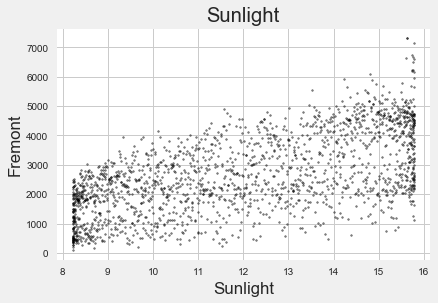

In [97]:
# Create data
predictor = "Sunlight"
counter = "Fremont"
x = predictorsDF[predictor]
y = predictorsDF["Fremont"]
colors = (0,0,0)
area = np.pi*1
 
# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title(predictor)
plt.xlabel(predictor)
plt.ylabel(counter)
plt.show()

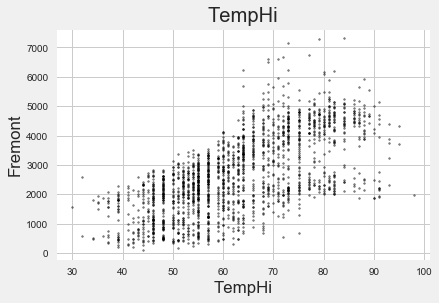

In [96]:
# Create data
predictor = "TempHi"
counter = "Fremont"
x = predictorsDF[predictor]
y = predictorsDF["Fremont"]
colors = (0,0,0)
area = np.pi*1
 
# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title(predictor)
plt.xlabel(predictor)
plt.ylabel(counter)
plt.show()

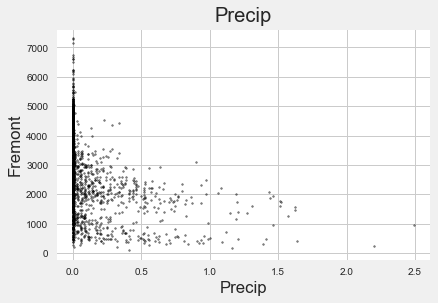

In [100]:
# Create data
predictor = "Precip"
counter = "Fremont"
x = predictorsDF[predictor]
y = predictorsDF["Fremont"]
colors = (0,0,0)
area = np.pi*1
 
# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title(predictor)
plt.xlabel(predictor)
plt.ylabel(counter)
plt.show()

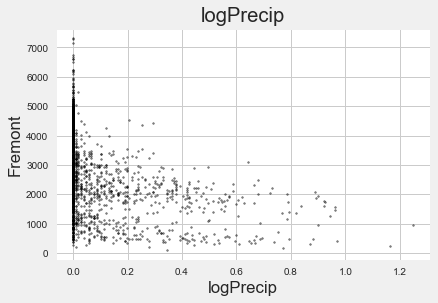

In [99]:
# Create data
predictor = "logPrecip"
counter = "Fremont"
x = predictorsDF[predictor]
y = predictorsDF["Fremont"]
colors = (0,0,0)
area = np.pi*1
 
# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title(predictor)
plt.xlabel(predictor)
plt.ylabel(counter)
plt.show()

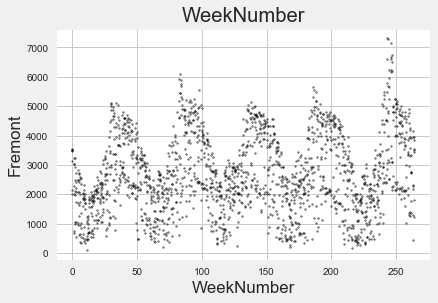

In [98]:
# Create data
predictor = "WeekNumber"
counter = "Fremont"
x = predictorsDF[predictor]
y = predictorsDF["Fremont"]
colors = (0,0,0)
area = np.pi*1
 
# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title(predictor)
plt.xlabel(predictor)
plt.ylabel(counter)
plt.show()

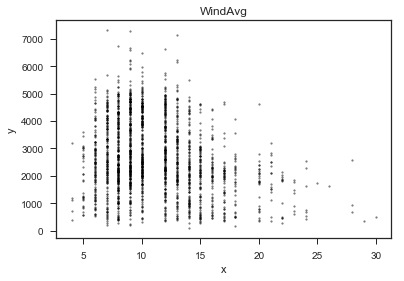

In [36]:
# Create data
predictor = "WindAvg"
x = predictorsDF[predictor]
y = predictorsDF["Fremont"]
colors = (0,0,0)
area = np.pi*1
 
# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title(predictor)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

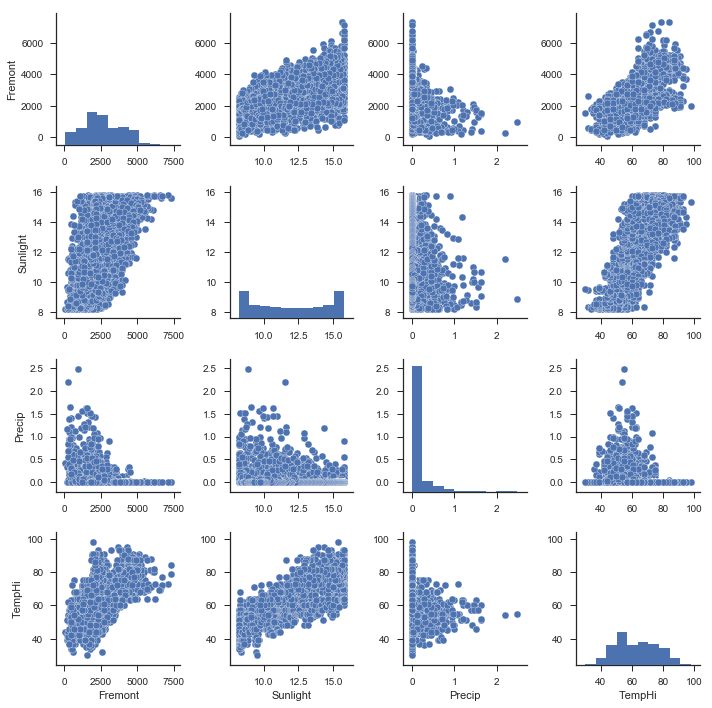

In [38]:
sns.set(style = "ticks")
df = predictorsDF.loc[:,["Fremont", "Sunlight", "Precip", "TempHi"]]
sns.pairplot(df)
plt.show()

In [70]:
predictorsDF.columns # Business Day is any weekday that is not a legal holiday

Index(['Date', 'BGT', 'Broad', 'Elliot', 'Fremont', 'MTS', 'NW58', 'Second',
       'Spokane', 'Thirty', 'TwoSix', 'Sunlight', 'Weekend', 'isMay', 'TempHi',
       'TempAvg', 'TempLow', 'DewHigh', 'DewAvg', 'DewLow', 'HumidHi',
       'HumidAvg', 'HumidLow', 'PressHigh', 'PressAvg', 'PressLow', 'VisHigh',
       'VisAvg', 'VisLow', 'WindAvg', 'WindLow', 'WindHigh', 'Precip',
       'Events', 'Holiday', 'BusinessDay', 'WeekNumber', 'Friday',
       'logPrecip'],
      dtype='object')

In [743]:
fit1 = smf.ols('Fremont ~ Sunlight+Weekend+TempHi+VisLow+BusinessDay+WeekNumber+logPrecip', 
               data=predictorsDF).fit()

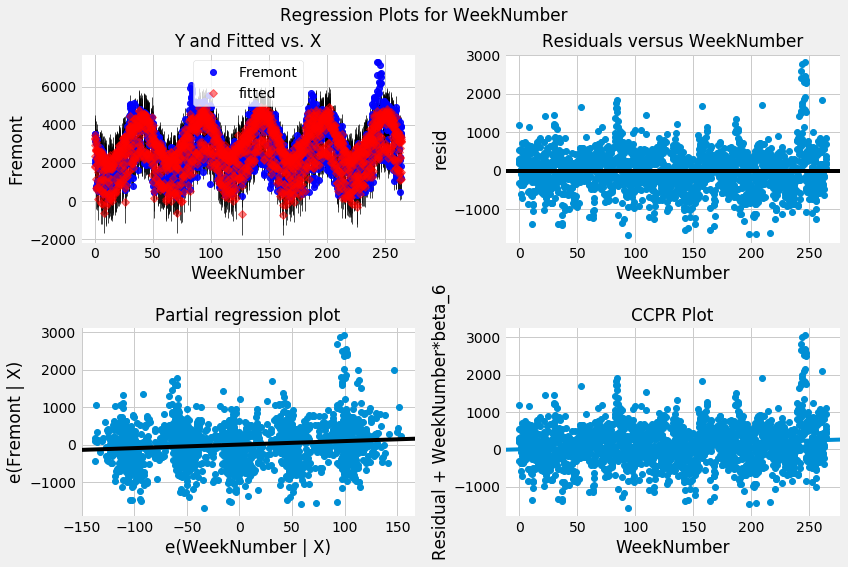

In [744]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(fit1, "WeekNumber", fig=fig)
plt.show()

## Model Formulation

In [897]:
# Create a list of Prophet forecasts, one series for each counter
Models = []
for i in range(10):
    # Start dataframe at each counter with first date counter was active.
    # All counters except Fremont and Second began on 1/1/2014
    if predictorsDF.columns[i] == 'Fremont': k = 0 # 10/3/2012
    elif predictorsDF.columns[i] == 'Second': k = 820 # 1/1/2015
    else: k = 455    #1/1/2014
    
    df = pd.DataFrame(data = {'ds': predictorsDF.index[k:], # dates
                          'y': predictorsDF.iloc[k:, i], # Counts
                          'logPrecip': predictorsDF['logPrecip'][k:], # log of rainfall in inches
                             'TempHi': predictorsDF['TempHi'][k:],  # Daily high temperature, Fahrenheit
                             'cap': max(predictorsDF.iloc[k:, i]),
                             'floor': min(predictorsDF.iloc[k:, i])}) # Maximum value = maximum observed in dataset

    # Create the Prophet Model
    m = Prophet(growth='linear', yearly_seasonality=True, weekly_seasonality = True)
    m.add_regressor('logPrecip')
    m.add_regressor('TempHi')

    # Fit the Prpohet Model
    m.fit(df)
    Models.append(m)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True t

3688.0

## Model Prediction

In [920]:
# Create the dataframe to house the dates to predict, and their forecasted weather

# Create list of dates, for the next 10 days
days = 7

thisDay = datetime.today()
date_list = [(thisDay + timedelta(days=x)).date() for x in range(0, days)]

# Compute number of days since last date of actuals, in this case October 31, 2017
delt = (datetime.today().date() - datetime(2017, 10, 31).date()).days

# Get weather forecast data, to predict upcoming bike counts using weatherbit API, in Imperial measures.
ForecastURL= 'http://api.wunderground.com/api/91468d8e9a46ecc5/forecast10day/q/WA/Seattle.json'
forecastJSON = pd.read_json(ForecastURL) # Read in the JSON data from API call
logPrecip = [] # list to house rainfall forecasts
TempHi = []
for i in range(days): 
    DayDict = forecastJSON.iloc[1, 0]['forecastday'][i] # Identify location in JSON where data appears
    logPrecip.append(np.log(DayDict['qpf_allday']['in'] + 1)) # Add 1 to avoid log of zero
    TempHi.append(int(DayDict['high']['fahrenheit'])) 
    
# Create dataframe
future = pd.DataFrame({'TempHi': TempHi,
                      'logPrecip': logPrecip,
                      'ds': date_list,
                      'floor': 0,
                      'cap': max(predictorsDF["Fremont"])},
                     index = list(range(days)))


In [921]:
# Create table of forecasts
FutureCounts = pd.DataFrame({}, index = date_list)
for i in range(10):
    forecast = Models[i].predict(future)
    FutureCounts[predictorsDF.columns[i]] = list(forecast['yhat']) # Create column for each counter forecast

In [901]:
forecast = Models[3].predict(future)

In [904]:
round(FutureCounts)

,BGT,Broad,Elliot,Fremont,MTS,NW58,Second,Spokane,Thirty,TwoSix
2017-11-30,1547.0,2701.0,2452.0,2329.0,2051.0,601.0,2675.0,2145.0,1953.0,160.0
2017-12-01,1469.0,2660.0,2280.0,1881.0,1967.0,615.0,2553.0,1970.0,1924.0,125.0
2017-12-02,1506.0,2496.0,1714.0,107.0,1978.0,609.0,1947.0,1515.0,1799.0,61.0
2017-12-03,1760.0,2529.0,2026.0,630.0,2161.0,607.0,2039.0,1690.0,1833.0,53.0
2017-12-04,1577.0,2684.0,2461.0,2287.0,2038.0,619.0,2620.0,2128.0,1945.0,142.0
2017-12-05,1698.0,2724.0,2653.0,2728.0,2166.0,646.0,2767.0,2275.0,1974.0,159.0
2017-12-06,1746.0,2732.0,2681.0,2796.0,2187.0,649.0,2796.0,2304.0,1970.0,146.0


## Model Validation

### Validation: Creation

In [957]:
# Create a list of Prophet forecasts, one series for each counter
ModelsValidation = []
L = 1824
for i in range(10):
    # Start dataframe at each counter with first date counter was active.
    # All counters except Fremont and Second began on 1/1/2014
    if predictorsDF.columns[i] == 'Fremont': k = 0 # 10/3/2012
    elif predictorsDF.columns[i] == 'Second': k = 820 # 1/1/2015
    else: k = 455    #1/1/2014
    
    df = pd.DataFrame(data = {'ds': predictorsDF.index[k:L], # dates
                          'y': predictorsDF.iloc[k:L, i], # Counts
                          'logPrecip': predictorsDF['logPrecip'][k:L], # log of rainfall in inches
                             'TempHi': predictorsDF['TempHi'][k:L],  # Daily high temperature, Fahrenheit
                             'cap': max(predictorsDF.iloc[k:L, i]),
                             'floor': min(predictorsDF.iloc[k:L, i])}) # Maximum value = maximum observed in dataset

    # Create the Prophet Model
    m = Prophet(growth='linear', yearly_seasonality=True, weekly_seasonality = True) # Alternatively, growth = 'linear'
    m.add_regressor('logPrecip')
    m.add_regressor('TempHi')

    # Fit the Prpohet Model
    m.fit(df)
    ModelsValidation.append(m)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True t

### Validation: Prediction

In [958]:
# Create the dataframe to house the dates to predict, and their forecasted weather

# Create list of dates, for the next 10 days
Oct1 = datetime(2017,10,1)
date_list = [(Oct1 + timedelta(days=x)).date() for x in range(0, 31)]
    
# Create dataframe
future = pd.DataFrame({'TempHi': list(predictorsDF["TempHi"][1824:]),
                      'logPrecip': list(predictorsDF["logPrecip"][1824:]),
                      'ds': date_list,
                      'floor': 0,
                      'cap': max(predictorsDF["Fremont"])},
                     index = date_list)

In [960]:
# Create table of forecasts
FutureCounts = pd.DataFrame({}, index = date_list)
for i in range(10):
    forecast = ModelsValidation[i].predict(future)
    FutureCounts[predictorsDF.columns[i]] = list(forecast['yhat']) # Create column for each counter forecast
    
FutureCounts = round(FutureCounts)

In [961]:
MAPE = []
for i in range(10):
    name = predictorsDF.columns[i]
    MAPE.append(np.mean(abs(FutureCounts[name] - predictorsDF[name]))/np.mean(predictorsDF[name]))
    
np.mean(MAPE)

0.19755355641061842

In [962]:
MAPE

[0.13813532140412732,
 0.2232194326738344,
 0.16910039909010308,
 0.12538926193580885,
 0.1291406924900218,
 0.1602670565837168,
 0.10768645093790982,
 0.14677710324310703,
 0.2728767467379639,
 0.5029430990095912]

## Validation without Imputed Data

In [974]:
dailyPath = r"C:\Users\asher\Documents\GitHub\data602-finalproject\dailyDF.csv"
dailyDF = pd.read_csv(dailyPath, index_col = 0)

Indx = [] # Index to hold dates
for i in range(len(dailyDF)): 
    # Convert strings containing dates (eg '2012-10-03') to date objects
    Indx.append(datetime.strptime(dailyDF.index[i], '%Y-%m-%d').date())
predictorsDF.index = Indx

In [999]:
df = pd.DataFrame(data = {'ds': predictorsDF.index[k:L].values, # dates
                          'y': dailyDF.iloc[k:L, i].values, # Counts
                          'logPrecip': predictorsDF['logPrecip'][k:L].values, # log of rainfall in inches
                         'TempHi': predictorsDF['TempHi'][k:L].values})  # Daily high temperature, Fahrenheit
                        

In [1000]:
# Create a list of Prophet forecasts, one series for each counter
ModelsValidation2 = []
L = 1824
for i in range(10):
    # Start dataframe at each counter with first date counter was active.
    # All counters except Fremont and Second began on 1/1/2014
    if dailyDF.columns[i] == 'Fremont': k = 0 # 10/3/2012
    elif dailyDF.columns[i] == 'Second': k = 820 # 1/1/2015
    else: k = 455    #1/1/2014
    
    df = pd.DataFrame(data = {'ds': predictorsDF.index[k:L].values, # dates
                          'y': dailyDF.iloc[k:L, i].values, # Counts
                          'logPrecip': predictorsDF['logPrecip'][k:L].values, # log of rainfall in inches
                             'TempHi': predictorsDF['TempHi'][k:L].values,  # Daily high temperature, Fahrenheit
                             'cap': max(dailyDF.iloc[k:L, i]),
                             'floor': min(dailyDF.iloc[k:L, i])}) # Maximum value = maximum observed in dataset

    # Create the Prophet Model
    m = Prophet(growth='linear', yearly_seasonality=True, weekly_seasonality = True) # Alternatively, growth = 'linear'
    m.add_regressor('logPrecip')
    m.add_regressor('TempHi')

    # Fit the Prpohet Model
    m.fit(df)
    ModelsValidation2.append(m)
    
# Create the dataframe to house the dates to predict, and their forecasted weather

# Create list of dates, for the next 10 days
Oct1 = datetime(2017,10,1)
date_list = [(Oct1 + timedelta(days=x)).date() for x in range(0, 31)]
    
# Create dataframe
future = pd.DataFrame({'TempHi': list(predictorsDF["TempHi"][1824:]),
                      'logPrecip': list(predictorsDF["logPrecip"][1824:]),
                      'ds': date_list,
                      'floor': 0,
                      'cap': max(dailyDF["Fremont"])},
                     index = date_list)

# Create table of forecasts
FutureCounts = pd.DataFrame({}, index = date_list)
for i in range(10):
    forecast = ModelsValidation2[i].predict(future)
    FutureCounts[predictorsDF.columns[i]] = list(forecast['yhat']) # Create column for each counter forecast
    
FutureCounts = round(FutureCounts)

MAPE = []
for i in range(10):
    name = predictorsDF.columns[i]
    MAPE.append(np.mean(abs(FutureCounts[name] - predictorsDF[name]))/np.mean(predictorsDF[name]))
    
np.mean(MAPE)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True t

0.214332039827169

In [1001]:
MAPE

[0.20363848828028014,
 0.25099037057482043,
 0.17060018090021484,
 0.12477437228593131,
 0.21015410116495034,
 0.1511273288588622,
 0.1089419880340469,
 0.14607204227810766,
 0.27362231161976164,
 0.5033992142747148]

In [964]:
FutureCounts

,BGT,Broad,Elliot,Fremont,MTS,NW58,Second,Spokane,Thirty,TwoSix,BGTReal
2017-10-01,1166.0,216.0,817.0,2021.0,659.0,150.0,337.0,470.0,72.0,155.0,919.0
2017-10-02,999.0,369.0,1258.0,3663.0,543.0,157.0,899.0,904.0,183.0,250.0,1023.0
2017-10-03,1157.0,411.0,1474.0,4150.0,692.0,181.0,1040.0,1064.0,212.0,284.0,1196.0
2017-10-04,1178.0,414.0,1464.0,4160.0,693.0,174.0,1046.0,1068.0,203.0,278.0,1133.0
2017-10-05,1093.0,399.0,1382.0,3961.0,655.0,161.0,1001.0,1003.0,188.0,266.0,1211.0
2017-10-06,969.0,351.0,1152.0,3439.0,541.0,159.0,864.0,796.0,157.0,233.0,909.0
2017-10-07,1143.0,204.0,706.0,1895.0,638.0,155.0,295.0,418.0,49.0,178.0,706.0
2017-10-08,1157.0,192.0,773.0,1928.0,663.0,127.0,268.0,428.0,48.0,162.0,983.0
2017-10-09,1018.0,346.0,1239.0,3603.0,562.0,141.0,832.0,875.0,162.0,255.0,1209.0
2017-10-10,801.0,336.0,1087.0,3482.0,478.0,126.0,877.0,815.0,158.0,261.0,690.0


In [916]:
ModelsValidation[3].plot_components(forecast);


2017-10-01    62
2017-10-02    63
2017-10-03    68
2017-10-04    68
2017-10-05    68
2017-10-06    64
2017-10-07    62
2017-10-08    62
2017-10-09    64
2017-10-10    57
2017-10-11    57
2017-10-12    50
2017-10-13    57
2017-10-14    57
2017-10-15    62
2017-10-16    63
2017-10-17    61
2017-10-18    64
2017-10-19    55
2017-10-20    54
2017-10-21    59
2017-10-22    61
2017-10-23    64
2017-10-24    66
2017-10-25    66
2017-10-26    60
2017-10-27    64
2017-10-28    66
2017-10-29    57
2017-10-30    63
2017-10-31    60
Name: TempHi, dtype: int64

In [886]:
forecast['yhat']

0    1968.562236
1    1984.628022
2     213.940983
3     744.276532
4    2399.241266
5    2844.800506
6    2914.672676
Name: yhat, dtype: float64

In [ ]:
# Create dataframe to house dates for FB forecasts
future = m.make_future_dataframe(periods=0, freq='D')

# Add in logPrecip to future dataframe
future['logPrecip'] = list(predictorsDF['logPrecip'])
future['TempHi'] = list(predictorsDF['TempHi'])

# Create the forecast
forecast = m.predict(future)

In [734]:
forecastJSON.data[4]

{'app_max_temp': 45.1,
 'app_min_temp': 40.5,
 'clouds': 97,
 'datetime': '2017-12-02',
 'dewpt': 37.8,
 'max_dhi': 216.8,
 'max_temp': 45.1,
 'min_temp': 41,
 'pop': 35,
 'precip': 0.2,
 'pres': 999.9,
 'rh': 88,
 'slp': 1009.3,
 'snow': 0,
 'snow_depth': 0,
 'temp': 41,
 'ts': 1512216000,
 'uv': 2,
 'vis': 5.6,
 'weather': {'code': '804', 'description': 'Overcast clouds', 'icon': 'c04d'},
 'wind_cdir': 'ENE',
 'wind_cdir_full': 'east-northeast',
 'wind_dir': 67,
 'wind_spd': 0}

In [830]:
# Create list of dates, for the next 10 days
from datetime import timedelta
thisDay = datetime.today()
date_list = [(thisDay + timedelta(days=x)).date() for x in range(0, 7)]

# Compute number of days since last date of actuals, in this case October 31, 2017
delt = (datetime.today().date() - datetime(2017, 10, 31).date()).days

# Get weather forecast data, to predict upcoming bike counts using weatherbit API, in inches.
ForecastURL= 'http://api.wunderground.com/api/91468d8e9a46ecc5/forecast10day/q/CA/Seattle.json'
forecastJSON = pd.read_json(ForecastURL) # Read in the JSON data from API call
Precip2 = [] # list to house rainfall forecasts
TempHi2 = []
for i in range(7): # 7 days, but up to 10 day forecast
    DayDict = forecastJSON.iloc[1, 0]['forecastday'][i]
    Precip2.append(DayDict['qpf_allday']['in'])
    TempHi2.append(int(DayDict['high']['fahrenheit']))

    
logPrecip2 = np.log(np.add(Precip2, 1))


In [487]:
# Create a dataframe 
FuturePredictors = pd.DataFrame({'TempHi': TempHi2,
                                 'BusinessDay': BusinessDay2,
                                 'logPrecip': logPrecip2,
                                 'Sunlight': Sunlight2,
                                'BGT' : FBForecasts7[0],
                                'Broad': FBForecasts7[1],
                                'Elliot': FBForecasts7[2],
                                'Fremont': FBForecasts7[3],
                                'MTS': FBForecasts7[4],
                                'NW58': FBForecasts7[5],
                                'Second': FBForecasts7[6],
                                'Spokane': FBForecasts7[7],
                                'Thirty': FBForecasts7[8],
                                'TwoSix': FBForecasts7[9]
                                },
                               index = date_list)

In [356]:
# Create a dataframe 
FuturePredictors = pd.DataFrame({'TempHi': TempHi2,
                                 'BusinessDay': BusinessDay2,
                                 'logPrecip': logPrecip2,
                                },
                               index = date_list)